#**Import các thư viện cần thiết**

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns

<ipython-input-1-48511cc35d14>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/LẬP TRÌNH PYTHON/FinalTest')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**Đọc dữ liệu**

In [ ]:
df = pd.read_csv('./OnlineRetail.csv',  encoding='unicode_escape', dtype={'CustomerID': 'Int64'})
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680,France


**Mô tả về tập dữ liệu:**
- Tập dữ liệu xuyên quốc gia này chứa thông tin của tất cả các giao dịch xảy ra từ ngày 12/01/2010 đến ngày 12/09/2011 của một cửa hàng bán lẻ trực tuyến không có cửa hàng đã đăng ký và có trụ sở tại Vương quốc Anh.
- Dữ liệu gồm có 541909 dòng và 8 cột thuộc tính:
    + **InvoiceNo**: Mã hóa đơn, là một số nguyên gồm 6 chữ số được gán duy nhất cho mỗi giao dịch.
    + **StockCode**: Mã sản phẩm (mặt hàng), là một số nguyên gồm 5 chữ số được gán duy nhất cho từng sản phẩm riêng biệt.
    + **Description**: Tên sản phẩm (mặt hàng).
    + **Quantity**: Số lượng của từng sản phẩm (mặt hàng) trên mỗi giao dịch.
    + **InvoiceDate**: Ngày và giờ lập hóa đơn.
    + **UnitPrice**: Đơn giá của mỗi sản phẩm, được tính bằng đồng bảng Anh.
    + **CustomerID**: Mã số khách hàng, là một số nguyên gồm 5 chữ số được gán duy nhất cho mỗi khách hàng.
    + **Country**: Tên quốc gia nơi mỗi khách hàng cư trú.

In [ ]:
df.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
99166,544717,22515,CHILDS GARDEN SPADE PINK,6,2/23/2011 10:44,2.10,18172,United Kingdom
121002,546688,22792,FLUTED ANTIQUE CANDLE HOLDER,12,3/16/2011 10:17,0.85,16497,United Kingdom
271832,560723,23065,LARGE DECO JEWELLERY STAND,1,7/20/2011 13:53,12.50,16464,United Kingdom
131947,547651,20686,DOLLY MIXTURE CHILDREN'S UMBRELLA,1,3/24/2011 12:11,3.25,16904,United Kingdom
537069,581238,21216,"SET 3 RETROSPOT TEA,COFFEE,SUGAR",2,12/8/2011 10:53,10.79,<NA>,United Kingdom
442887,574683,22779,WOODEN OWLS LIGHT GARLAND,1,11/6/2011 12:50,4.25,16372,United Kingdom
67516,541836,22423,REGENCY CAKESTAND 3 TIER,32,1/23/2011 10:29,10.95,15465,United Kingdom
136149,547937,21636,MADRAS NOTEBOOK MEDIUM,3,3/28/2011 14:27,2.55,15068,United Kingdom
2597,536592,21820,GLITTER HEART GARLAND WITH BELLS,1,12/1/2010 17:06,7.62,<NA>,United Kingdom
116301,546236,22780,LIGHT GARLAND BUTTERFILES PINK,4,3/10/2011 12:48,4.25,12370,Cyprus


#**Tiền xử lý và làm sạch dữ liệu**

In [ ]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  Int64  
 7   Country      541909 non-null  object 
dtypes: Int64(1), float64(1), int64(1), object(5)
memory usage: 33.6+ MB


**Nhận xét:**
- Dữ liệu định tính: 5 cột ('InvoiceNo', 'StockCode', 'Description', 'InvoiceDate', 'Country')
- Dữ liệu định lượng: 3 cột ('Quantity', 'UnitPrice', 'CustomerID')
- Dữ liệu ở cột **InvoiceDate** là dữ liệu thời gian đang bị **sai kiểu dữ liệu** => **Sửa object -> datetime**
- Dữ liệu ở cột `InvoiceNo` và `StockCode` không được đồng bộ, lúc chữ hoa chữ thường -> Cùng một `Discription` nhưng lại có 2 mã `StockCode` khác nhau và ngược lại => Ta sẽ xử lý bằng cách thống nhất lại hết kiểu chữ in hoa cho các cột này.

In [ ]:
# Chuyển cột 'InvoiceDate' sang định dạng datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  Int64         
 7   Country      541909 non-null  object        
dtypes: Int64(1), datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 33.6+ MB


In [ ]:
# Chuẩn hóa và làm sạch dữ liệu trong cột 'Description'
df['Description'] = df['Description'].str.upper()
df['Description'] = df['Description'].str.strip()
df['Description'] = df['Description'].replace('\s+',' ', regex=True)

# Chuyển các cột 'InvoiceNo', 'StockCode' sang chữ hoa
df['InvoiceNo'] = df['InvoiceNo'].astype(str).str.upper()
df['StockCode'] = df['StockCode'].str.upper()

In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.0
mean,9.552250,4.611114,15287.69057
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.0
25%,1.000000,1.250000,13953.0
50%,3.000000,2.080000,15152.0
75%,10.000000,4.130000,16791.0
max,80995.000000,38970.000000,18287.0


**Nhận xét:**

**1. Quantity:**
- Số lượng trung bình mỗi hóa đơn là 9.55 và độ lệch chuẩn là 218.08. Điều này cho thấy đang có sự biến động lớn trong số lượng hàng hóa mua mỗi hóa đơn.
- Giá trị nhỏ nhất là -80995 (Có sự **bất thường** ở đây vì số lượng trong một đơn hàng không thể nào là âm, có thể là trả hàng hoặc dữ liệu nhập sai)
- Giá trị lớn nhất cũng là 80995.**(Đáng chú ý)**
- Tứ phân vị: Đa số các đơn hàng đều có số lượng nằm trong khoảng từ 1 đến 10:
    + 25% đơn hàng có số lượng <= 1 sản phẩm
    + 50% đơn hàng có số lượng <= 3 sản phẩm
    + 75% đơn hàng có số lượng <= 10 sản phẩm

**2. UnitPrice:**
- Đơn giá trung bình của mỗi sản phẩm là 4.61, nhưng độ lệch chuẩn rất cao, là 96.76, cho thấy độ biến động lớn giữa giá cả của các sản phẩm.
- Giá trị nhỏ nhất là -11062.06, điều này không hợp lý giá tiền không thể âm, **(Cần được kiểm tra và xử lý)**
- Giá trị lớn nhất là 38970. **(Check kỹ - vì có khả năng là ngoại lại)**
- Tứ phân vị: Đa số các mặt hàng đều có giá tiền trong khoảng từ 1 - 4:
    + 25% các mặt hàng đều có giá tiền <= 1.25
    + 50% các mặt hàng đều có giá tiền <= 2.08
    + 75% các mặt hàng đều có giá tiền <= 4.13

**3. CustomerID:**
- Số lượng khách hàng là 406829, điều này cho thấy giá trị của cột CustomerID bị thiếu (NaN) khá lá nhiều.**(Cần check và xử lý)**
- Đây chỉ là thông tin về mã khách hàng nên các giá trị thống kê mô tả này không có ý nghĩa.

###**Xử lý dữ liệu Missing Value**

In [ ]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
df_null = round(df.isnull().sum()/len(df)*100, 2)
df_null

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

**Dữ liệu ở 2 cột Description và CustomerID đang có xuất hiện giá trị NULL (Descriotion: 0.27% tập dữ liệu - CustomerID: 24.93%(~25) tập dữ liệu (Khá là lớn)**

In [ ]:
df[df['Description'] == '?']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
7313,537032,21275,?,-30,2010-12-03 16:50:00,0.0,<NA>,United Kingdom
21518,538090,20956,?,-723,2010-12-09 14:48:00,0.0,<NA>,United Kingdom
38261,539494,21479,?,752,2010-12-20 10:36:00,0.0,<NA>,United Kingdom
43662,540100,22837,?,-106,2011-01-04 16:53:00,0.0,<NA>,United Kingdom
50806,540558,21258,?,-29,2011-01-10 10:04:00,0.0,<NA>,United Kingdom
51673,540651,82599,?,-290,2011-01-10 15:00:00,0.0,<NA>,United Kingdom
68920,541882,48185,?,-57,2011-01-24 10:54:00,0.0,<NA>,United Kingdom
78235,542861,47591B,?,-207,2011-02-01 11:47:00,0.0,<NA>,United Kingdom
94765,544410,84997C,?,-741,2011-02-18 13:54:00,0.0,<NA>,United Kingdom
97643,544649,21621,?,-400,2011-02-22 12:37:00,0.0,<NA>,United Kingdom


**Nhận xét:**
- Dựa trên tỉ lệ giá trị NULL có trong data ở  2 cột `Description` và `CustomerID` thì ta thấy mặc dù là cột `Description` có xuất hiện NULL nhưng không nhiều so với cả tập dữ liệu (chưa đầy 0.5%) nên ta sẽ xử lý bằng việc là **xóa những dòng mà có giá trị NULL ở cột `Description`** này.
- Cột `CustomerID` ngoài ra còn xuất hiện rất nhiều giá trị '?' không xác định được là gì và `UnitPrice` bằng '0' + `CustomerID` cũng là 'NA' -> **Xóa những dòng có `CustomerID` = '?' và `CustomerID` = 'NA'**
- Cột `CustomerID` có tỉ lệ xuất hiện NULL cũng khá là nhiều (~25% tập dữ liệu) => **Ta sẽ giữ nguyên cột `CustomerID`**.

In [ ]:
df = df.dropna(subset=['Description'])

In [ ]:
df.drop(df[df['Description'].str.contains('?',regex=False) == True].index, inplace = True)
df.drop(df[df['UnitPrice'] == 0].index, inplace = True)

<ipython-input-14-a482a014bbe6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[df['Description'].str.contains('?',regex=False) == True].index, inplace = True)
<ipython-input-14-a482a014bbe6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[df['UnitPrice'] == 0].index, inplace = True)


In [ ]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     132605
Country             0
dtype: int64

###**Xử lý dữ liệu trùng lặp Duplicated**

In [ ]:
df.duplicated().sum()

5263

In [ ]:
df[df.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446,United Kingdom


In [ ]:
df.drop_duplicates(inplace = True)

<ipython-input-18-9ce7144259af>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace = True)


In [ ]:
df.duplicated().sum()

0

###**Xử lý dữ liệu sai logic và Outlier**

**Kiểm tra những dữ liệu có cột Quantity < 0**

In [ ]:
df[df['Quantity'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,DISCOUNT,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397,United Kingdom
541541,C581499,M,MANUAL,-1,2011-12-09 10:28:00,224.69,15498,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315,United Kingdom


**Như đã nói trước ở trên, những dòng mà có cột `Quantiy` mang giá trị âm và cột `InvoiceDate` có chữ cái 'C' ở đầu mã hóa đơn (Cxxxxxx) thì đây là những đơn hàng bị khách hàng hủy hoặc là hoàn hàng lại nên sẽ được mã hóa thành kiểu như vậy để có thể phân loại đơn hàng.**

**Check Outlier ở cột 'Quantity'**

<Axes: ylabel='Quantity'>

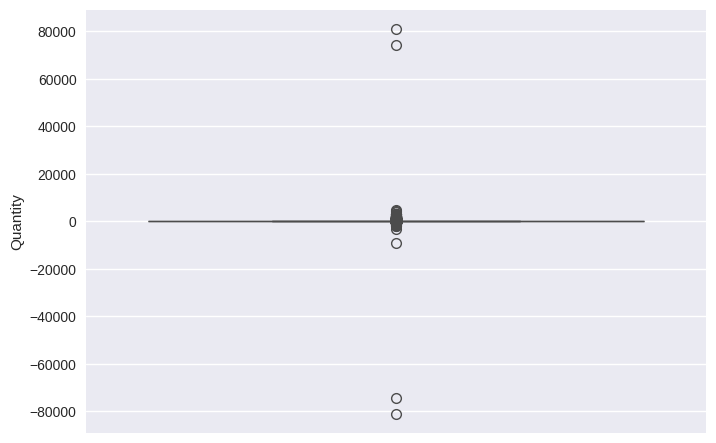

In [ ]:
sns.boxplot(data = df, y = 'Quantity')

In [ ]:
points_max = df.nlargest(2, 'Quantity')
points_max

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446,United Kingdom
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom


In [ ]:
points_min = df.nsmallest(2, 'Quantity')
points_min

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446,United Kingdom
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346,United Kingdom


**Đây có thể là do đơn hàng này giá trị nó quá lớn, khách hàng không muốn nhận hoặc không đủ tiền để thanh toán nên đã hủy đơn -> Giá trị Outlier -> Xóa**

In [ ]:
df.drop(points_max.index.union(points_min.index), inplace=True)

<ipython-input-24-25a35f22c46e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(points_max.index.union(points_min.index), inplace=True)


<Axes: ylabel='Quantity'>

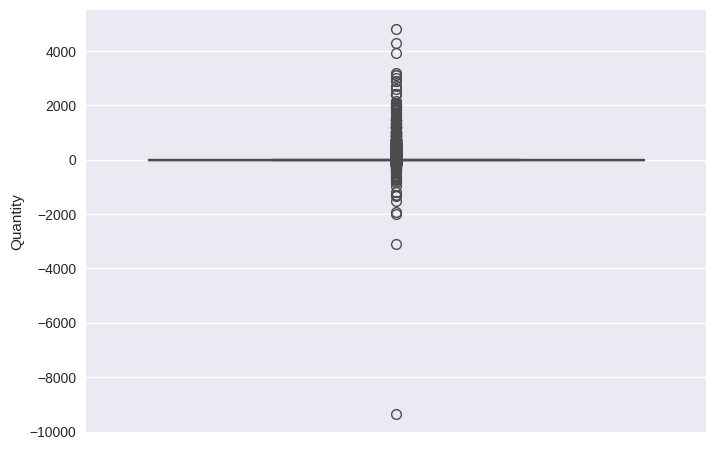

In [ ]:
sns.boxplot(data = df, y = 'Quantity')

In [ ]:
points_max = df.nlargest(3, 'Quantity')
points_max

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
421632,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,2011-10-27 12:26:00,0.21,12901,United Kingdom
206121,554868,22197,SMALL POPCORN HOLDER,4300,2011-05-27 10:52:00,0.72,13135,United Kingdom
97432,544612,22053,EMPIRE DESIGN ROSETTE,3906,2011-02-22 10:43:00,0.82,18087,United Kingdom


**Check Outlier ở cột 'UnitPrice'**

<Axes: ylabel='UnitPrice'>

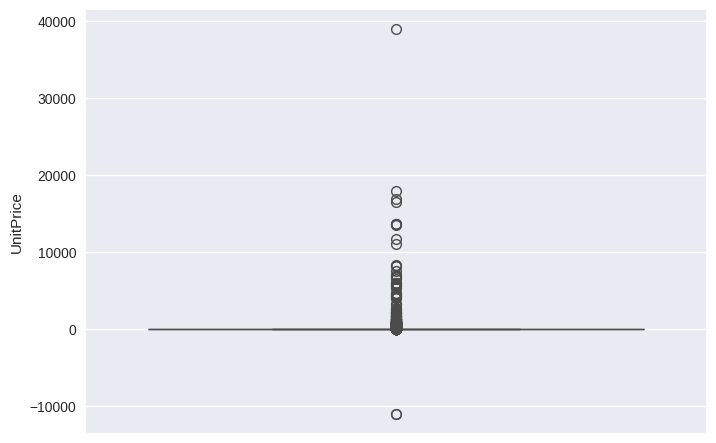

In [ ]:
sns.boxplot(data = df, y = 'UnitPrice')

In [ ]:
df[df['UnitPrice'] == df['UnitPrice'].max()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
222681,C556445,M,MANUAL,-1,2011-06-10 15:31:00,38970.0,15098,United Kingdom


In [ ]:
df[df['InvoiceNo'].astype(str).str.startswith('A')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299982,A563185,B,ADJUST BAD DEBT,1,2011-08-12 14:50:00,11062.06,<NA>,United Kingdom
299983,A563186,B,ADJUST BAD DEBT,1,2011-08-12 14:51:00,-11062.06,<NA>,United Kingdom
299984,A563187,B,ADJUST BAD DEBT,1,2011-08-12 14:52:00,-11062.06,<NA>,United Kingdom


**Cùng một mặt hàng có mã StockCode giống nhau, Description giống nhau nhưng lại có giá UnitPrice khác nhau**

In [ ]:
df[df['StockCode'] == '10002']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
31,536370,10002,INFLATABLE POLITICAL GLOBE,48,2010-12-01 08:45:00,0.85,12583,France
142,536382,10002,INFLATABLE POLITICAL GLOBE,12,2010-12-01 09:45:00,0.85,16098,United Kingdom
4272,536756,10002,INFLATABLE POLITICAL GLOBE,1,2010-12-02 14:23:00,0.85,<NA>,United Kingdom
5466,536863,10002,INFLATABLE POLITICAL GLOBE,1,2010-12-03 11:19:00,0.85,17967,United Kingdom
5546,536865,10002,INFLATABLE POLITICAL GLOBE,5,2010-12-03 11:28:00,1.66,<NA>,United Kingdom
...,...,...,...,...,...,...,...,...
142354,548606,10002,INFLATABLE POLITICAL GLOBE,120,2011-04-01 11:10:00,0.85,12731,France
143465,548702,10002,INFLATABLE POLITICAL GLOBE,4,2011-04-03 11:36:00,0.85,17085,United Kingdom
143930,548714,10002,INFLATABLE POLITICAL GLOBE,2,2011-04-03 15:07:00,0.85,17337,United Kingdom
158070,550272,10002,INFLATABLE POLITICAL GLOBE,62,2011-04-15 12:14:00,0.85,18079,United Kingdom


**Thay đổi lại giá cho các sản phẩm có cùng Stock Code**

In [ ]:
unique_stock_codes = df['StockCode'].unique()
stock_modes_dict = {}
for code in unique_stock_codes:
    stock_modes_dict[code] = df[df['StockCode'] == code]['UnitPrice'].mode()[0]

for code, mode_value in stock_modes_dict.items():
    df.loc[df['StockCode'] == code, 'UnitPrice'] = mode_value

In [ ]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.95,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.75,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,4.15,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.75,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,4.25,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


In [ ]:
df[df['StockCode'] == '23256']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
148425,549238,23256,CHILDRENS CUTLERY SPACEBOY,2,2011-04-07 11:30:00,4.15,14667,United Kingdom
148992,549262,23256,CHILDRENS CUTLERY SPACEBOY,2,2011-04-07 12:38:00,4.15,14465,United Kingdom
151065,549537,23256,CHILDRENS CUTLERY SPACEBOY,2,2011-04-08 17:22:00,4.15,<NA>,United Kingdom
151455,549556,23256,CHILDRENS CUTLERY SPACEBOY,2,2011-04-10 12:53:00,4.15,17372,United Kingdom
153310,549737,23256,KIDS CUTLERY SPACEBOY,4,2011-04-12 09:03:00,4.15,13599,United Kingdom
...,...,...,...,...,...,...,...,...
536286,581219,23256,CHILDRENS CUTLERY SPACEBOY,2,2011-12-08 09:28:00,4.15,<NA>,United Kingdom
538082,581395,23256,CHILDRENS CUTLERY SPACEBOY,1,2011-12-08 13:18:00,4.15,16892,United Kingdom
538679,581412,23256,CHILDRENS CUTLERY SPACEBOY,3,2011-12-08 14:38:00,4.15,14415,United Kingdom
538736,581414,23256,CHILDRENS CUTLERY SPACEBOY,1,2011-12-08 14:39:00,4.15,14730,United Kingdom


**Vẫn còn một số sản phẩm có cùng mã StockCode giống nhau nhưng Description của nó lại không trùng nhau => Lỗi của bên nhập liệu**

**Tách bảng lưu trữ thông tin về các sản phẩm**

In [ ]:
new_df = df[['StockCode', 'Description', 'UnitPrice']].copy()

# Tạo cột First_5_Char lấy 5 ký tự đầu tiên của mã StockCode
new_df['First_5_Char'] = new_df['StockCode'].str[:5]

# Tạo cột Last_Char lấy chữ cái cuối cùng của mã StockCode
new_df['Last_Char'] = new_df['StockCode'].str[-1]

# Gom nhóm theo First_5_Char, Last_Char và Description, đếm số lượng của mỗi mô tả
result = new_df.groupby(['StockCode', 'First_5_Char', 'Last_Char', 'Description', 'UnitPrice']).size().reset_index(name='Count')
result.to_csv('StockCode.csv', index=False)

In [ ]:
df_stockCode = pd.read_csv('./StockCode.csv')
df_stockCode

,StockCode,First_5_Char,Last_Char,Description,UnitPrice,Count
0,10002,10002,2,INFLATABLE POLITICAL GLOBE,0.850,71
1,10080,10080,0,GROOVY CACTUS INFLATABLE,0.390,22
2,10120,10120,0,DOGGY RUBBER,0.210,29
3,10123C,10123,C,HEARTS WRAPPING TAPE,0.650,3
4,10124A,10124,A,SPOTS ON RED BOOKCOVER TAPE,0.420,5
...,...,...,...,...,...,...
4047,GIFT_0001_50,GIFT_,0,DOTCOMGIFTSHOP GIFT VOUCHER £50.00,41.670,4
4048,M,M,M,MANUAL,1.250,561
4049,PADS,PADS,S,PADS TO MATCH ALL CUSHIONS,0.001,3
4050,POST,POST,T,POSTAGE,18.000,1252


In [ ]:
df_stockCode[df_stockCode['First_5_Char'] == '15044']

,StockCode,First_5_Char,Last_Char,Description,UnitPrice,Count
14,15044A,15044,A,PINK PAPER PARASOL,2.95,103
15,15044B,15044,B,BLUE PAPER PARASOL,2.95,61
16,15044C,15044,C,PURPLE PAPER PARASOL,2.95,90
17,15044D,15044,D,RED PAPER PARASOL,2.95,86


**Những sản phẩm nào có 5 ký tự mã StockCode đầu tiên nhưng ký tự cuối cùng khác nhau là những sản phẩm có nhiều màu hoặc là nhiều loại khác nhau nên sẽ được đánh dấu như vậy để phân biệt**

<ipython-input-37-220d17c45f18>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')


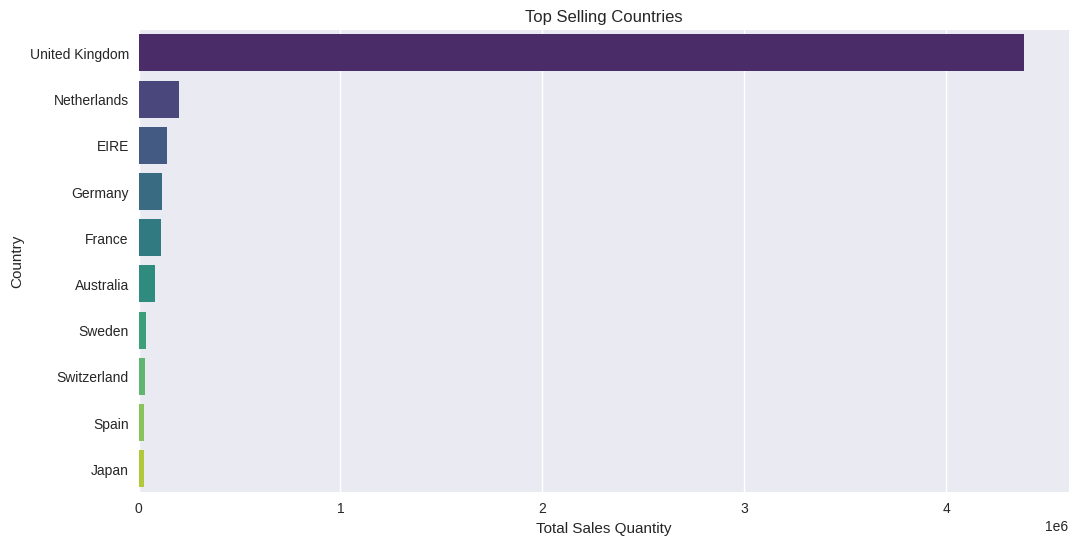

In [ ]:
# Top-selling countries
top_countries = df.groupby('Country')['Quantity'].sum().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.xlabel('Total Sales Quantity')
plt.ylabel('Country')
plt.title('Top Selling Countries')
plt.show()

**Dựa vào biểu đồ quốc gia bán hàng chạy nhất phía trên thì ta thấy UK đang là thị trường mà có lượng khách hàng tiêu thụ lớn nhất. Do vậy, trong phần xây dựng mô hình để phân loại nhóm khách hàng tiếp theo, ta sẽ chỉ tập trung vào thị trường UK này, các quốc gia khác dữ liệu nó hơi ít nên ta sẽ bỏ qua.**

#**Xây dựng mô hình**

##**Chuẩn bị dữ liệu**

In [ ]:
# Tập trung chỉ vào thị trường Vương Quốc Anh và loại bỏ các dữ liệu khác
df = df[df['Country'] == 'United Kingdom']

# Loại bỏ cột 'Country' vì chỉ có dữ liệu của Vương Quốc Anh
df.drop(columns=['Country'], inplace=True)

# Phân tích liên quan đến Khách hàng nên cần loại bỏ tất cả các giao dịch có giá trị NaN trong cột CustomerID.
df = df[df['CustomerID'].notna()]

df

<ipython-input-38-41fa1587c219>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Country'], inplace=True)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.95,17850
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.75,17850
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,4.15,17850
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.75,17850
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,4.25,17850
...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,9.95,13113
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,9.95,13113


In [ ]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
dtype: int64

In [ ]:
# Tạo biến mới: Revenue = Quantity * UnitPrice
df['Revenue'] = df['Quantity'] * df['UnitPrice']

In [ ]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.95,17850,17.70
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.75,17850,22.50
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,4.15,17850,33.20
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.75,17850,22.50
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,4.25,17850,25.50
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,8.50,17850,17.00
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.95,17850,29.70
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,2.10,17850,12.60
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,2.10,17850,12.60
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047,54.08


##**Phân nhóm khách hàng dùng chỉ số RFM**

<img src='https://d35fo82fjcw0y8.cloudfront.net/2018/03/01013508/Incontent_image.png'>

**RFM là viết tắt của Recency - Frequency - Monetary**.

Phân tích RFM đánh giá mức độ quan trọng của mỗi khách hàng dựa trên ba điểm chính:
- Recency: Thời gian gần đây mua sắm (khoảng thời gian từ lần gần nhất khách hàng ghé mua hàng tính đến thời điểm xét)
- Frequency: Tần suất khách hàng ghé vào mua sắm
- Monetary: Giá trị tiền bạc mà họ chi tiêu cho việc mua sắm.

Điểm số được gán từ 1 đến 5, với số càng cao thể hiện kết quả càng tốt. Khách hàng được coi là "tốt nhất" khi có điểm cao nhất trong mỗi tiêu chí này.

Dựa theo lý thuyết trên, ta có thể chia khách hàng thành các nhóm như sau:

🥲 **GIÁ TRỊ THẤP**: Những khách hàng ít hoạt động hơn so với người khác, không mua sắm hoặc ghé thăm thường xuyên và tạo ra doanh thu rất thấp.

🙂 **GIÁ TRỊ TRUNG BÌNH**: Nằm giữa mọi thứ. Mua sắm thường xuyên (nhưng không nhiều như Giá trị Cao) và tạo ra doanh thu trung bình.

🤑 **GIÁ TRỊ CAO**: Nhóm mà chúng ta muốn giữ chặt. Doanh thu cao và mua sắm thường xuyên.

##**Recency**

###**Bước 1: Tính Recency**

- Xác định ngày mua gần đây nhất của mỗi khách hàng và xem họ đã không hoạt động trong bao nhiêu ngày.
- Sau khi có số ngày không hoạt động cho mỗi khách hàng, ta sẽ áp dụng phân cụm K-means để gán cho khách hàng một điểm Recency.

In [ ]:
# Bước 1: Tìm ngày mua gần đây nhất của mỗi khách hàng
recency = df.groupby('CustomerID')['InvoiceDate'].max().reset_index().rename(columns={'InvoiceDate': 'MaxPurchaseDate'})
recency

,CustomerID,MaxPurchaseDate
0,12747,2011-12-07 14:34:00
1,12748,2011-12-09 12:20:00
2,12749,2011-12-06 09:56:00
3,12820,2011-12-06 15:12:00
4,12821,2011-05-09 15:51:00
...,...,...
3943,18280,2011-03-07 09:52:00
3944,18281,2011-06-12 10:53:00
3945,18282,2011-12-02 11:43:00
3946,18283,2011-12-06 12:02:00


In [ ]:
# Bước 2: Tính toán cột mới gọi là Recency, đó là khoảng thời gian giữa ngày mua sắm gần nhất của mỗi khách hàng và ngày mua sắm gần nhất trong toàn bộ dữ liệu.
recency['Recency'] = recency['MaxPurchaseDate'].max() - recency['MaxPurchaseDate']
recency

,CustomerID,MaxPurchaseDate,Recency
0,12747,2011-12-07 14:34:00,1 days 22:15:00
1,12748,2011-12-09 12:20:00,0 days 00:29:00
2,12749,2011-12-06 09:56:00,3 days 02:53:00
3,12820,2011-12-06 15:12:00,2 days 21:37:00
4,12821,2011-05-09 15:51:00,213 days 20:58:00
...,...,...,...
3943,18280,2011-03-07 09:52:00,277 days 02:57:00
3944,18281,2011-06-12 10:53:00,180 days 01:56:00
3945,18282,2011-12-02 11:43:00,7 days 01:06:00
3946,18283,2011-12-06 12:02:00,3 days 00:47:00


In [ ]:
# Bước 3: Chuyển đổi Recency thành số ngày
recency['Recency'] = recency['Recency'].dt.days
recency

,CustomerID,MaxPurchaseDate,Recency
0,12747,2011-12-07 14:34:00,1
1,12748,2011-12-09 12:20:00,0
2,12749,2011-12-06 09:56:00,3
3,12820,2011-12-06 15:12:00,2
4,12821,2011-05-09 15:51:00,213
...,...,...,...
3943,18280,2011-03-07 09:52:00,277
3944,18281,2011-06-12 10:53:00,180
3945,18282,2011-12-02 11:43:00,7
3946,18283,2011-12-06 12:02:00,3


<Axes: xlabel='Recency', ylabel='Count'>

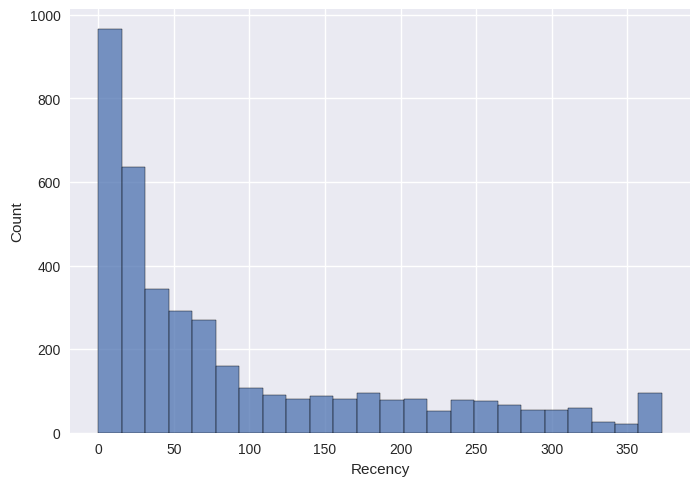

In [ ]:
# Vẽ biểu đồ histogram để hiển thị phân phối của Recency
sns.histplot(data=recency, x='Recency')

###**Bước 2: Áp dụng phân cụm K-Means trên Recency để phân nhóm khách hàng**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

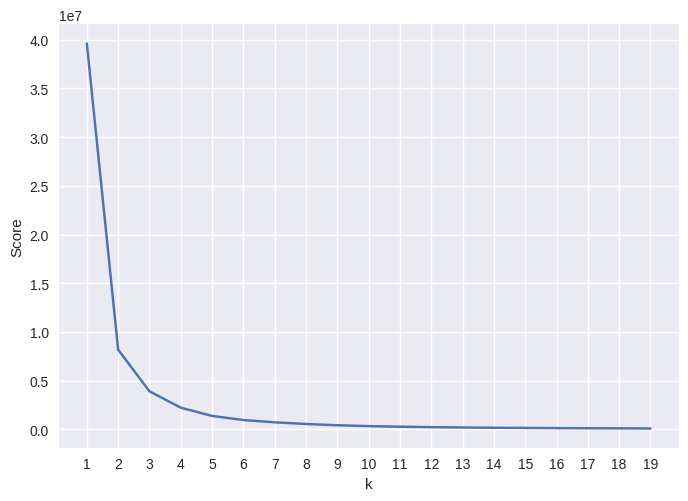

In [ ]:
from sklearn.cluster import KMeans

# Sử dụng phương pháp Elbow (biểu đồ khuỷu tay) để xấp xỉ số lượng cụm.
X = recency[['Recency']].values

# Tính tổng khoảng cách từ từng data đến centroid tương ứng
# Số WWCS (tổng bình phương nội cụm) càng nhỏ --> Các data ở rất gần centroid mà nó thuộc về

wcss = []
k_values = range(1, 20)

for i in k_values:
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot
plt.plot(k_values, wcss)
plt.xlabel('k')
plt.xticks(range(1, 20))
plt.ylabel('Score');

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
clusters = kmeans.predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
clusters

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [ ]:
# Tạo một cột mới có tên là RecencyCluster để lưu thông tin cụm
recency['RecencyCluster'] = clusters
recency

,CustomerID,MaxPurchaseDate,Recency,RecencyCluster
0,12747,2011-12-07 14:34:00,1,0
1,12748,2011-12-09 12:20:00,0,0
2,12749,2011-12-06 09:56:00,3,0
3,12820,2011-12-06 15:12:00,2,0
4,12821,2011-05-09 15:51:00,213,2
...,...,...,...,...
3943,18280,2011-03-07 09:52:00,277,1
3944,18281,2011-06-12 10:53:00,180,2
3945,18282,2011-12-02 11:43:00,7,0
3946,18283,2011-12-06 12:02:00,3,0


In [ ]:
recency.groupby('RecencyCluster')['Recency'].describe()

,count,mean,std,min,25%,50%,75%,max
RecencyCluster,,,,,,,,
0,2649.0,30.325783,24.994334,0.0,9.0,24.0,49.0,91.0
1,563.0,293.628774,45.633723,224.0,255.0,286.0,327.5,373.0
2,736.0,153.255435,38.177352,92.0,119.0,153.0,185.0,222.0


Sau khi đã phân cụm khách hàng thành công, tiếp theo để sử dụng những chỉ số cụm này làm điểm tính Recency Score thì ta cần sắp xếp lại các chỉ số một chút. Tính gần đây càng cao, giá trị mà khách hàng mang lại cho chúng ta càng thấp, do đó tính gần đây cao hơn nên dẫn đến điểm số thấp hơn.

In [ ]:
def order_cluster(cluster_field_name, target_field_name, df, ascending):

    # Tính giá trị trung bình của trường mục tiêu cho mỗi cụm
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()

    # Sắp xếp các cụm dựa trên giá trị trung bình của trường mục tiêu, theo thứ tự tăng dần hoặc giảm dần
    df_new = df_new.sort_values(by=target_field_name, ascending=ascending).reset_index(drop=True)

    # Gán chỉ số mới cho mỗi cụm sau khi sắp xếp
    df_new['index'] = df_new.index

    # Ánh xạ chỉ số cụm mới này trở lại DataFrame ban đầu
    df_final = pd.merge(df, df_new[[cluster_field_name, 'index']], on=cluster_field_name)

    # Xóa cột cụm cũ vì chúng ta sẽ sử dụng chỉ số mới làm cụm
    df_final = df_final.drop([cluster_field_name], axis=1)

    # Đổi tên cột chỉ số mới thành tên của cột cụm ban đầu
    df_final = df_final.rename(columns={"index": cluster_field_name})

    return df_final

# Sắp xếp lại cụm 'RecencyCluster' dựa trên giá trị 'Recency', với giá trị recency cao sẽ có chỉ số cụm thấp hơn (điểm thấp hơn)
recency = order_cluster('RecencyCluster', 'Recency', recency, False)

In [ ]:
recency

,CustomerID,MaxPurchaseDate,Recency,RecencyCluster
0,12747,2011-12-07 14:34:00,1,2
1,12748,2011-12-09 12:20:00,0,2
2,12749,2011-12-06 09:56:00,3,2
3,12820,2011-12-06 15:12:00,2,2
4,12822,2011-09-30 10:04:00,70,2
...,...,...,...,...
3943,18233,2011-01-18 08:44:00,325,0
3944,18250,2011-02-11 13:59:00,300,0
3945,18256,2010-12-20 08:27:00,354,0
3946,18269,2010-12-16 15:39:00,357,0


In [ ]:
recency.groupby('RecencyCluster')['Recency'].describe()

,count,mean,std,min,25%,50%,75%,max
RecencyCluster,,,,,,,,
0,563.0,293.628774,45.633723,224.0,255.0,286.0,327.5,373.0
1,736.0,153.255435,38.177352,92.0,119.0,153.0,185.0,222.0
2,2649.0,30.325783,24.994334,0.0,9.0,24.0,49.0,91.0


##**Frequency**

### Bước 1: Tính Frequency
Để tìm chỉ số này, ta chỉ cần tính tổng số đơn hàng của mỗi khách hàng.

In [ ]:
# Tìm tổng số đơn hàng của mỗi khách hàng.
frequency = df.groupby('CustomerID').size().reset_index().rename(columns={0: 'Frequency'})
frequency

,CustomerID,Frequency
0,12747,103
1,12748,4458
2,12749,231
3,12820,59
4,12821,6
...,...,...
3943,18280,10
3944,18281,7
3945,18282,13
3946,18283,721


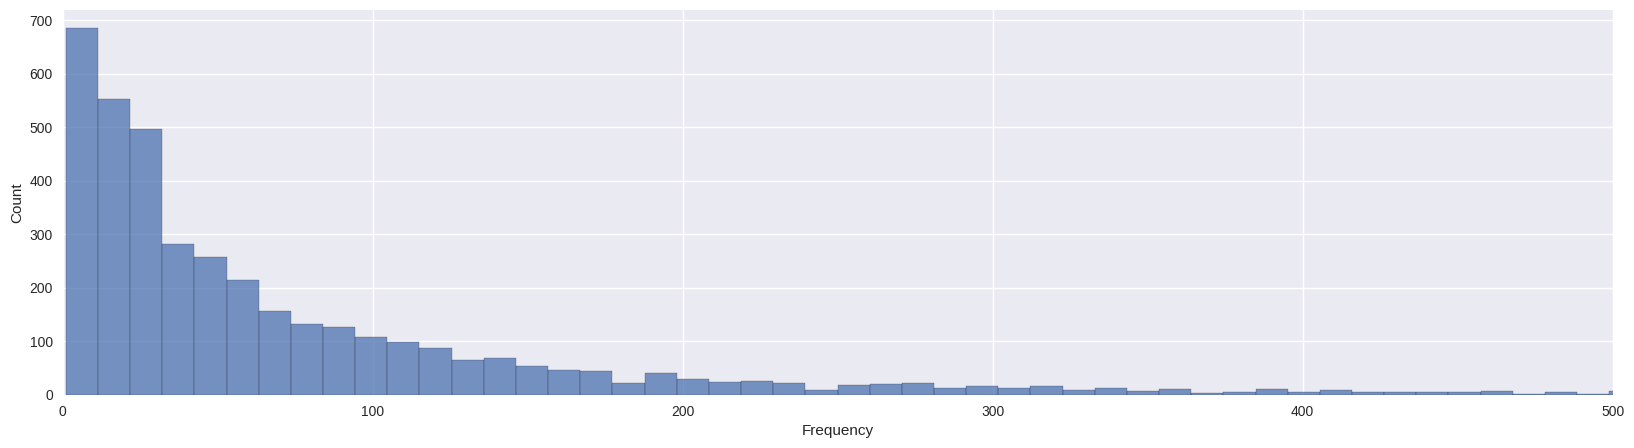

In [ ]:
# Vẽ biểu đồ histogram để biểu thị phân phối của Frequency
plt.figure(figsize=(20, 5))
sns.histplot(data=frequency, x='Frequency')
plt.xlim(0, 500)
plt.show()

###**Bước 2: Áp dụng K-Means lên frequency**

In [ ]:
X = frequency[['Frequency']].values

In [ ]:
# Dùng phương pháp Elbow
k_range = range(1, 20)

wcss = []
for i in k_range:
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

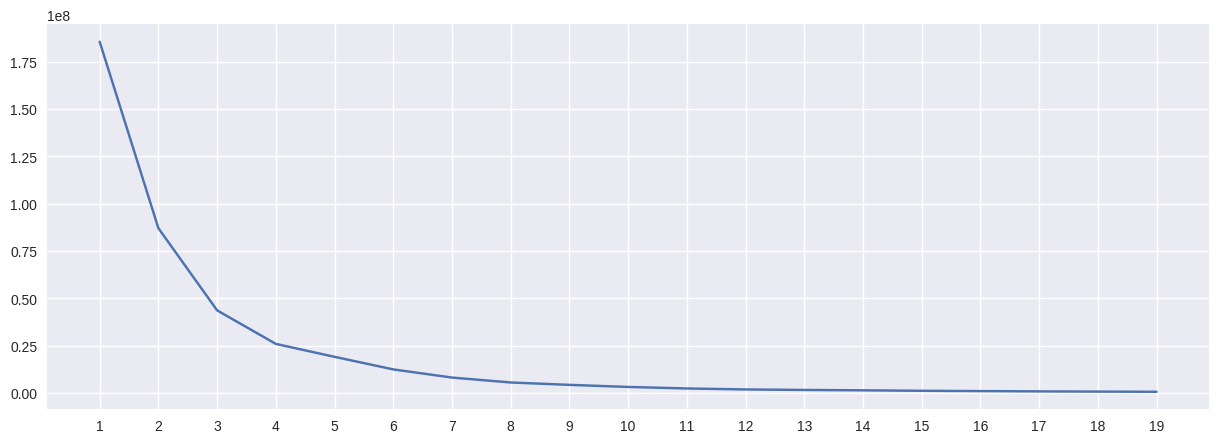

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(k_range, wcss)
plt.xticks(k_range)
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Tạo một cột mới có tên là FrequencyCluster để lưu thông tin cụm
frequency['FrequencyCluster'] = clusters
frequency

,CustomerID,Frequency,FrequencyCluster
0,12747,103,0
1,12748,4458,1
2,12749,231,0
3,12820,59,0
4,12821,6,0
...,...,...,...
3943,18280,10,0
3944,18281,7,0
3945,18282,13,0
3946,18283,721,2


In [ ]:
frequency.groupby('FrequencyCluster')['Frequency'].describe()

,count,mean,std,min,25%,50%,75%,max
FrequencyCluster,,,,,,,,
0,3682.0,57.747148,57.722329,1.0,16.0,36.0,82.75,268.0
1,3.0,5799.333333,1774.921219,4458.0,4793.0,5128.0,6470.00,7812.0
2,263.0,481.661597,309.255748,270.0,312.5,392.0,518.50,2759.0


In [ ]:
# Sắp xếp lại các cụm Frequency
frequency = order_cluster('FrequencyCluster', 'Frequency', frequency, True)

In [ ]:
frequency.head()

,CustomerID,Frequency,FrequencyCluster
0,12747,103,0
1,12749,231,0
2,12820,59,0
3,12821,6,0
4,12822,47,0


In [ ]:
frequency.groupby('FrequencyCluster')['Frequency'].describe()

,count,mean,std,min,25%,50%,75%,max
FrequencyCluster,,,,,,,,
0,3682.0,57.747148,57.722329,1.0,16.0,36.0,82.75,268.0
1,263.0,481.661597,309.255748,270.0,312.5,392.0,518.50,2759.0
2,3.0,5799.333333,1774.921219,4458.0,4793.0,5128.0,6470.00,7812.0


##**Revenue**

In [ ]:
# Tính tổng doanh thu mà mỗi khách hàng đã đạt được
revenue = df.groupby('CustomerID')['Revenue'].sum().reset_index()
revenue.head()

,CustomerID,Revenue
0,12747,4722.51
1,12748,39930.10
2,12749,3871.26
3,12820,938.94
4,12821,92.72


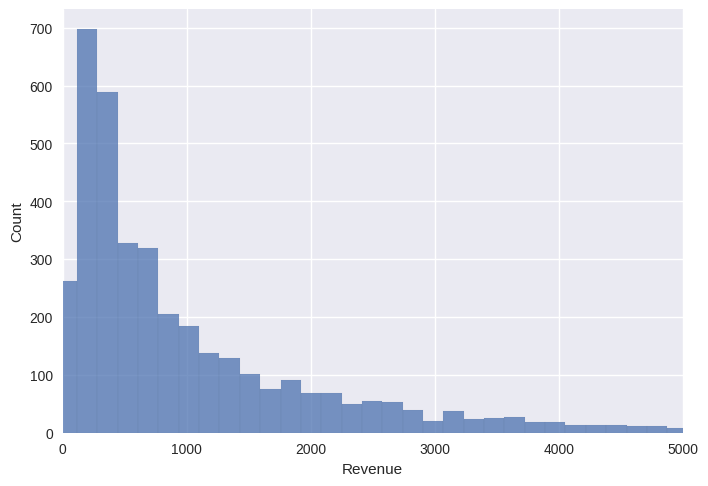

In [ ]:
# Vẽ biểu đồ histogram cho Doanh thu
sns.histplot(data=revenue, x='Revenue')
plt.xlim(0, 5000)
plt.show()

In [ ]:
X = revenue[['Revenue']].values

In [ ]:
# Sử dụng phương pháp Elbow để xấp xỉ số lượng cụm.
k_range = range(1, 20)

wcss = []
for i in k_range:
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

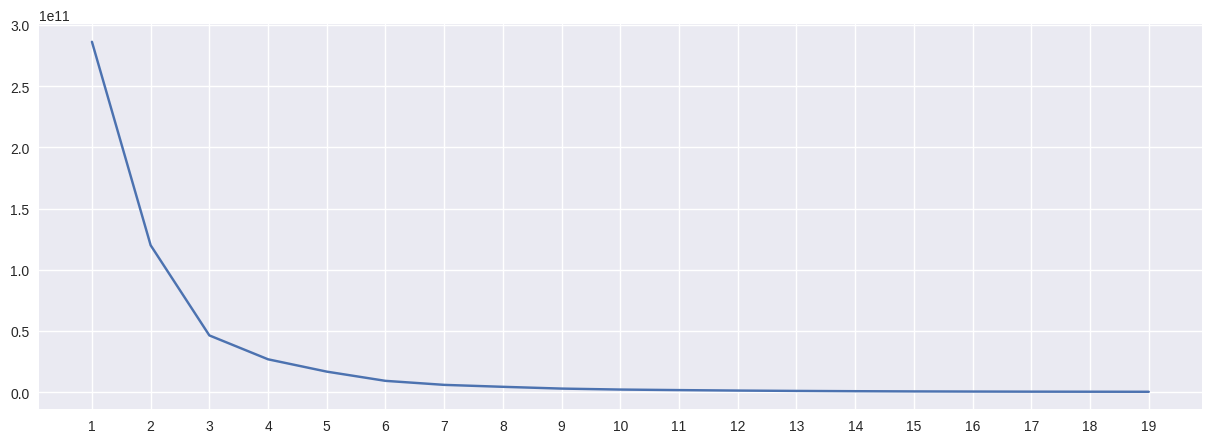

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(k_range, wcss)
plt.xticks(k_range)
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
cluster = kmeans.fit_predict(X)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Tạo một cột mới có tên là RevenueCluster để lưu thông tin cụm
revenue['RevenueCluster'] = cluster

In [ ]:
revenue.groupby('RevenueCluster')['Revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
RevenueCluster,,,,,,,,
0,27.0,55152.567407,31877.574531,28784.44,31967.2300,41249.820,67902.5100,175393.98
1,3920.0,1396.471715,2259.196523,-1362.20,283.4325,638.085,1551.1025,23802.49
2,1.0,404775.400000,NaN,404775.40,404775.4000,404775.400,404775.4000,404775.40


In [ ]:
revenue[revenue['Revenue'] < 0]

,CustomerID,Revenue,RevenueCluster
40,12870,-14.90,1
64,12908,-252.00,1
91,12943,-3.75,1
243,13154,-1.25,1
609,13672,-1.25,1
622,13693,-32.00,1
715,13829,-119.40,1
808,13958,-102.45,1
925,14119,-19.90,1
990,14213,-1362.20,1


In [ ]:
revenue = order_cluster('RevenueCluster', 'Revenue', revenue, True)

In [ ]:
revenue.groupby('RevenueCluster')['Revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
RevenueCluster,,,,,,,,
0,3920.0,1396.471715,2259.196523,-1362.20,283.4325,638.085,1551.1025,23802.49
1,27.0,55152.567407,31877.574531,28784.44,31967.2300,41249.820,67902.5100,175393.98
2,1.0,404775.400000,NaN,404775.40,404775.4000,404775.400,404775.4000,404775.40


##**RFM Score**

In [ ]:
# Kết hợp ba bảng recency, frequency và revenue lại với nhau.
final_rfm = pd.merge(recency[['CustomerID', 'Recency', 'RecencyCluster']], frequency, on='CustomerID')
final_rfm = pd.merge(final_rfm, revenue, on='CustomerID')
final_rfm

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster
0,12747,1,2,103,0,4722.51,0
1,12748,0,2,4458,2,39930.10,1
2,12749,3,2,231,0,3871.26,0
3,12820,2,2,59,0,938.94,0
4,12822,70,2,47,0,934.98,0
...,...,...,...,...,...,...,...
3943,18233,325,0,1,0,500.00,0
3944,18250,300,0,22,0,345.92,0
3945,18256,354,0,4,0,-39.06,0
3946,18269,357,0,8,0,138.90,0


In [ ]:
# Tạo một cột có tên là RFM_score, là tổng của ba điểm cụm.
final_rfm['RFM_score'] = final_rfm['RecencyCluster'] + final_rfm['FrequencyCluster'] + final_rfm['RevenueCluster']
final_rfm.sample(10)

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,RFM_score
2470,17892,55,2,28,0,246.50,0,2
3518,14165,275,0,24,0,120.44,0,0
2604,18198,3,2,166,0,5641.41,0,2
2204,17359,10,2,15,0,127.90,0,2
623,14125,10,2,166,0,2724.37,0,2
2490,17934,51,2,21,0,712.89,0,2
714,14317,64,2,24,0,522.18,0,2
2633,18255,88,2,6,0,103.30,0,2
3845,17343,354,0,17,0,220.74,0,0
707,14300,18,2,3,0,43.20,0,2


In [ ]:
# Lấy số lượng nhóm khách hàng
final_rfm['RFM_score'].value_counts()

2    2384
1     733
0     562
3     249
4      16
5       4
Name: RFM_score, dtype: int64

In [ ]:
# Tổng cộng, hiện chúng ta có 5 cụm khách hàng dựa trên RFM_score. Tìm giá trị trung bình của Recency, Frequency và Revenue của mỗi nhóm.
final_rfm.groupby('RFM_score')[['Recency', 'Frequency', 'Revenue']].mean()

,Recency,Frequency,Revenue
RFM_score,,,
0,293.615658,22.487544,385.919698
1,153.581173,38.379263,699.965363
2,32.527685,72.401426,1414.866763
3,12.831325,452.377510,6861.116988
4,6.875000,803.250000,65118.881875
5,1.000000,4457.750000,128684.940000


#**Kết luận**

In [ ]:
final_rfm['Segmentation'] = 'Low'
final_rfm.loc[final_rfm['RFM_score'] > 1, 'Segmentation'] = 'Mid'
final_rfm.loc[final_rfm['RFM_score'] > 3, 'Segmentation'] = 'High'

In [ ]:
final_rfm

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,RFM_score,Segmentation
0,12747,1,2,103,0,4722.51,0,2,Mid
1,12748,0,2,4458,2,39930.10,1,5,High
2,12749,3,2,231,0,3871.26,0,2,Mid
3,12820,2,2,59,0,938.94,0,2,Mid
4,12822,70,2,47,0,934.98,0,2,Mid
...,...,...,...,...,...,...,...,...,...
3943,18233,325,0,1,0,500.00,0,0,Low
3944,18250,300,0,22,0,345.92,0,0,Low
3945,18256,354,0,4,0,-39.06,0,0,Low
3946,18269,357,0,8,0,138.90,0,0,Low


In [ ]:
final_rfm['Segmentation'].value_counts()

Mid     2633
Low     1295
High      20
Name: Segmentation, dtype: int64

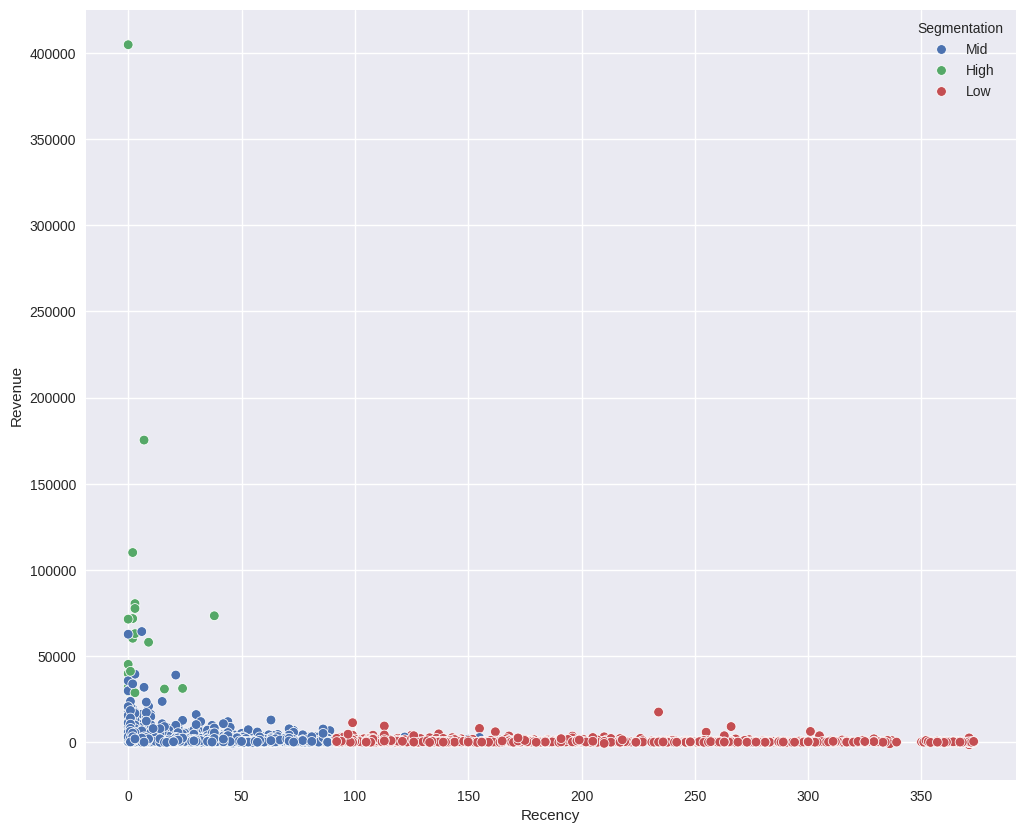

In [ ]:
plt.figure(figsize=(12,10))
sns.scatterplot(data=final_rfm, x="Recency", y="Revenue", hue="Segmentation")
plt.show()

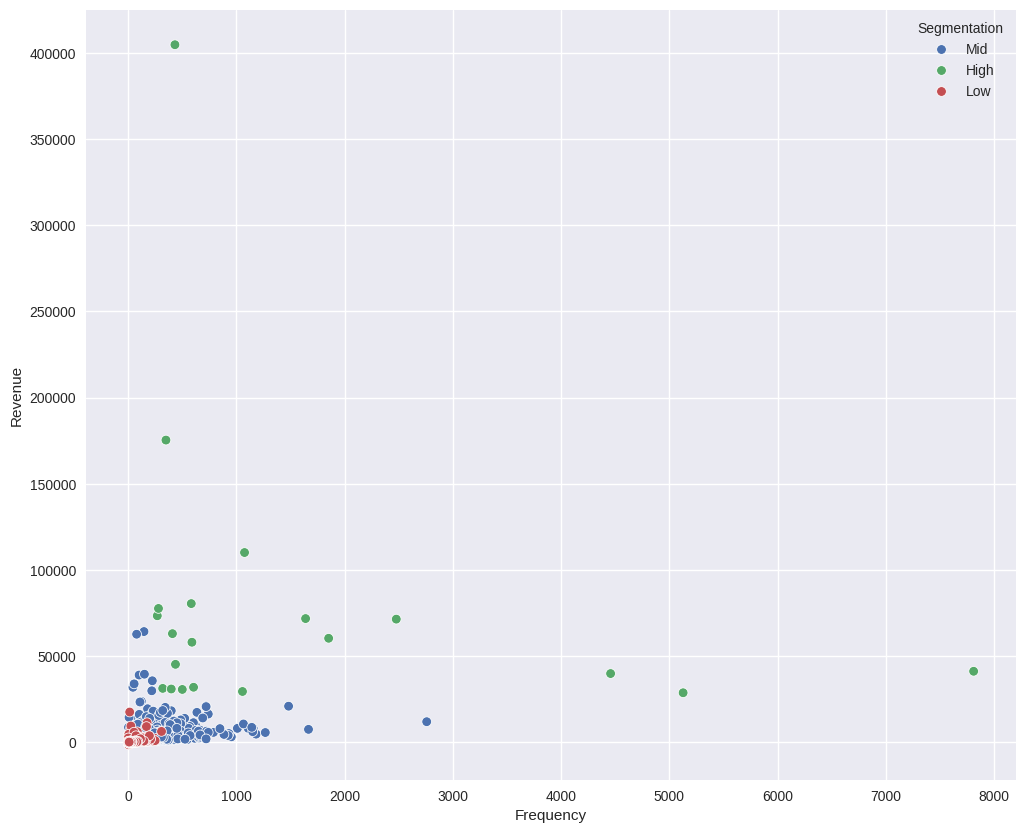

In [ ]:
plt.figure(figsize=(12,10))
sns.scatterplot(data=final_rfm, x="Frequency", y="Revenue", hue="Segmentation")
plt.show()

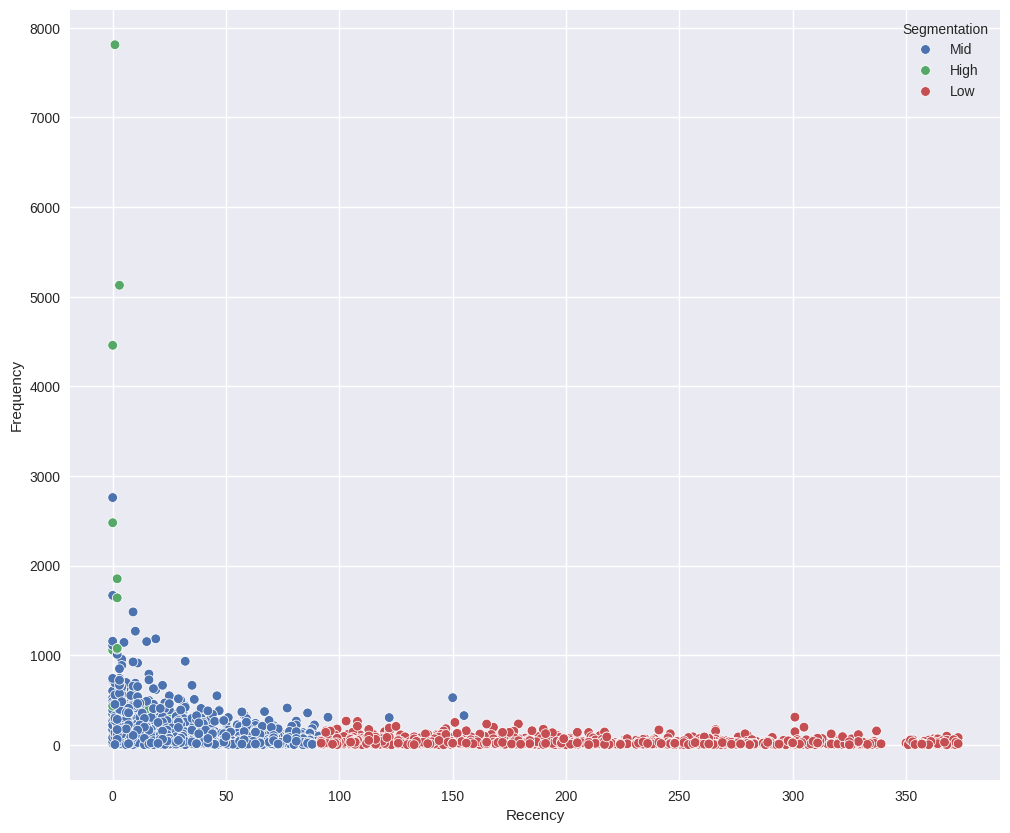

In [ ]:
plt.figure(figsize=(12,10))
sns.scatterplot(data=final_rfm, x="Recency", y="Frequency", hue="Segmentation")
plt.show()